# Introduction

This is an exploratory data analysis of historical World Health Organization (WHO) data on global suicides between 1985 and 2016.

# Purpose

The purpose of this project is to analyse global suicide rates over a period of time and identify trends, patterns, and potential associated factors.


# Tools and Libraries

 - **Pandas** for data manipulation and analysis.
 - **Matplotlib** and **Seaborn** for data visualisation.
 - **NumPy** for numerical operations.

# Data Preparation


In [1]:
# Import pandas package
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')

# Display the first few rows
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
# Dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [3]:
# Summary statistics
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
# Check for missing values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

# Exploratory Data Analysis (EDA):

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


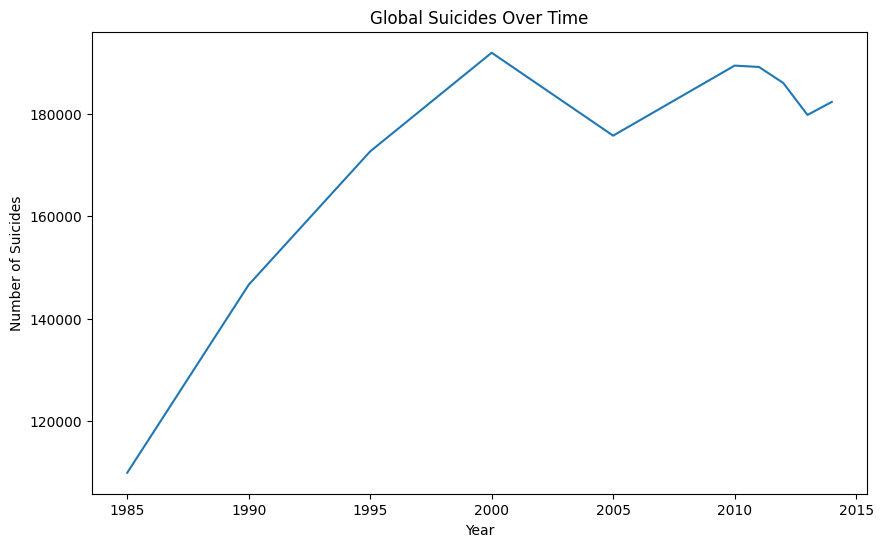

In [6]:
# Import data vis packages
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of suicides by year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='suicides_no', data=df.groupby('year').sum().reset_index())
plt.title('Global Suicides Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.show()

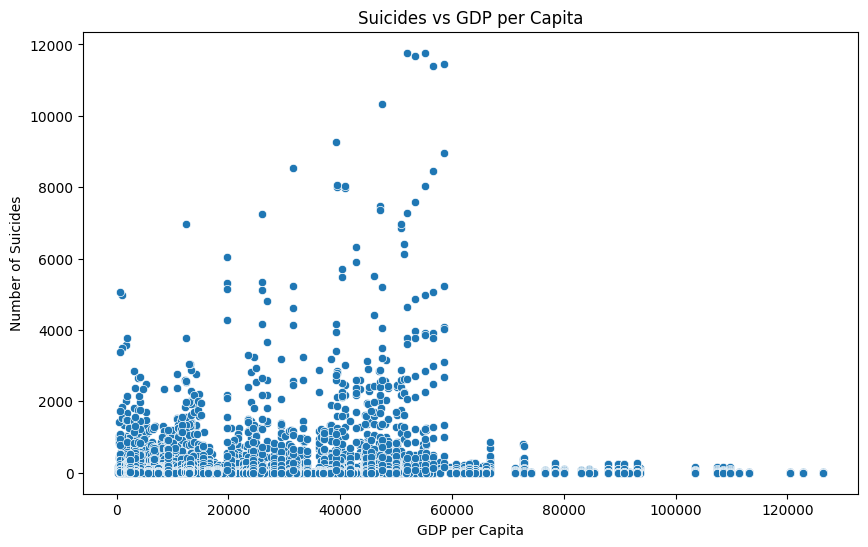

In [7]:
# Distribution of suicides Vs GDP per capita

# Plot the scatter chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides_no', data=df)
plt.title('Suicides vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Number of Suicides')
plt.show()

In [8]:
# Countries with GDP per Capita > 60,000
df_over_60000_gdp = df[df["gdp_per_capita ($)"] > 60000].groupby("country").agg({'gdp_per_capita ($)': 'mean'})

df_over_60000_gdp

,gdp_per_capita ($)
country,
Australia,69776.000000
Denmark,64065.000000
Iceland,60712.000000
Luxembourg,113224.833333
Norway,98989.666667
Qatar,88493.600000
Singapore,78074.000000
Sweden,62811.250000
Switzerland,87984.200000


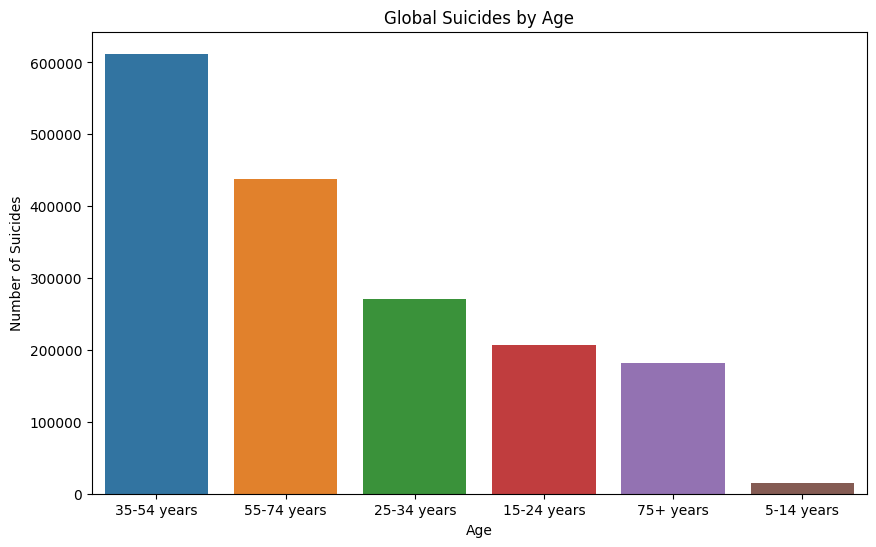

In [9]:
# Distribution of suicides by age
df_age_grouped = df.groupby('age')['suicides_no'].sum().reset_index()

# Sort by number of suicides in descending order
df_age_grouped = df_age_grouped.sort_values(by='suicides_no', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='suicides_no', data=df_age_grouped)
plt.title('Global Suicides by Age')
plt.xlabel('Age')
plt.ylabel('Number of Suicides')
plt.show()

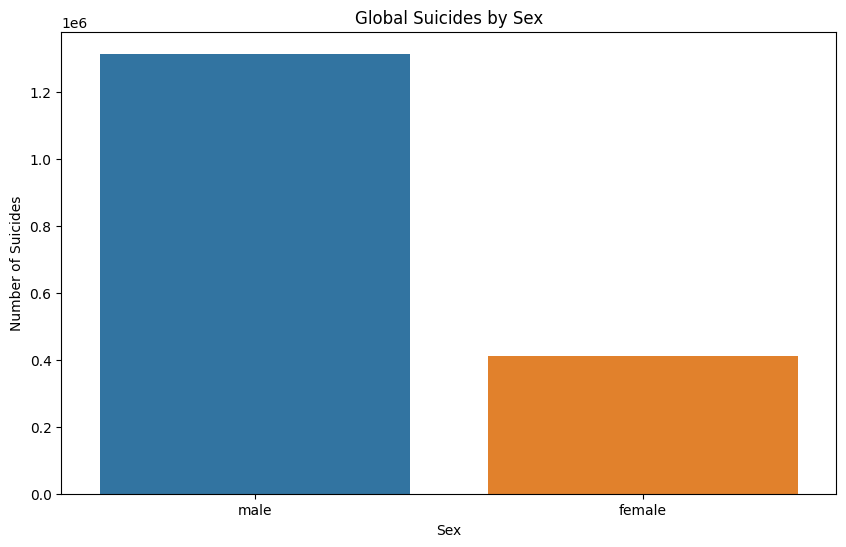

In [10]:
# Distribution of suicides by sex
df_sex_grouped = df.groupby('sex')['suicides_no'].sum().reset_index()

# Sort by number of suicides in descending order
df_sex_grouped = df_sex_grouped.sort_values(by='suicides_no', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='suicides_no', data=df_sex_grouped)
plt.title('Global Suicides by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Suicides')
plt.show()